# Importing libraries and loading data

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from datetime import datetime as dt

# Defining functions

In [2]:
def select_data_from_lat_csv(data,latitude):

    return data[data['latitude']==latitude]
def min_value(data):
    min_d=15582150000
    for d in data:
        if d<min_d:
            min_d=d
    return min_d
def higher_value(data):
    high=0
    for d in data:
        if d>high:
            high=d
    return high
def return_list_means(list_bikes):

    #	print(list_bikes[0:10])
    memory=27
    ponder=0.9
    return_list=[]
    sum=0
    for m in range(0,memory):
        sum+=list_bikes[m]
        return_list.append(sum/(m+1)*ponder)	
    count=1
    for i in range(memory,len(list_bikes)):
        sum=0
        for m in range(0,memory):
            sum+=list_bikes[i-m]*(ponder/memory*(memory-m))

        return_list.append(sum/memory)		
        count+=1	
    return return_list
def convert_df_to_list(df):
    return_list=[]
    for d in df:
        return_list.append(d)
    return return_list
def analize_point_data(data,point,bikes_column):
    jump=900
    previous=data[data.index[0]]

    count_lost_tuples=0
    for i in range(data.index[1],data.index[0]+len(data.index)):
        if data[i]-previous!=jump:
            count_lost_tuples+=int(((data[i]-previous)/jump)-1)

            '''print((data[i-1]))
            print((data[i]))
            print(bikes_column[i-1])
            print(bikes_column[i])'''
            input()
            print(i)
            print((data[i]))
            print("The difference is :"+str(data[i]-previous))
            print(str(int((data[i]-previous)/jump))+" tuples lost")

            print("Which is :"+str(dt.fromtimestamp(data[i])-dt.fromtimestamp(previous)))
            print(str(count_lost_tuples)+" lost tuples en total")

        previous=data[i]
    print(str(count_lost_tuples-1)+" lost tuples en total")
    print(str(count_lost_tuples/4)+" hour of lost data in point "+str(point))

    return count_lost_tuples-1

def generate_real_timestamp_bikes_list(data,timestamp_start=1544095800,timestamp_end=1558215900):
    return_list=[]
    timestamp_from_list=convert_df_to_list(data.timestamp_from)
    bikes_list=convert_df_to_list(data.bike_count)
    num_expected_rows=(timestamp_end-timestamp_start)/900
    for i in range(0,int(num_expected_rows)):
        if int(timestamp_start+(i*900)) in timestamp_from_list:

            #print(timestamp_from_list.index(int(timestamp_start+(i*900))))
            return_list.append(bikes_list[timestamp_from_list.index(int(timestamp_start+(i*900)))])
        else:
            return_list.append(0)


    return return_list
def show_data_real_timestamp_bikes_list(data,time_start,time_end):
    result_list=generate_real_timestamp_bikes_list(data,time_start,time_end)
    list_vals=return_list_means(result_list)
    '''print((result_list[0:24]))
    print((list_vals[0:24]))

    input()'''
    days=28
    for i in range(0,int(len(result_list)/(96*days))):

        plt.plot(result_list[i*96*days:i*96*days+96*days], 'g', alpha=0.7)
        plt.plot(list_vals[i*96*days:i*96*days+96*days], 'r')
        plt.legend(['Bike count', 'Trend'])
        plt.ylim(0,200)
        figManager = plt.get_current_fig_manager()
        figManager.full_screen_toggle() 
        plt.show()

    plt.plot(result_list,'g',alpha=0.7)
    plt.plot(list_vals,'r')
    plt.legend(['Bike count', 'Trend'])
    plt.ylim(0,200)
    figManager = plt.get_current_fig_manager()
    figManager.full_screen_toggle() 
    plt.show()
def obtain_latitudes_list(latitude_data):	
    return latitude_data.unique()

# Variables

In [3]:
dataset_all_points=pd.read_csv("./data/combined_data.tsv", delimiter="\t",header=0)
latitudes_list=obtain_latitudes_list(dataset_all_points.latitude)
timestamp_highest_value	=higher_value(dataset_all_points['timestamp_from'])
timestamp_lowest_value=min_value(dataset_all_points['timestamp_from'])
all_data_we_have=0

# Process information

Pole data on point 50.82448
14235 tuples
Must be :18473
we lost 1059.5 HOURS OF DATA
We have 77.05840957072485 % of data.
Press ENTER to show the figure...


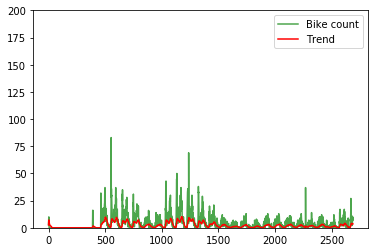

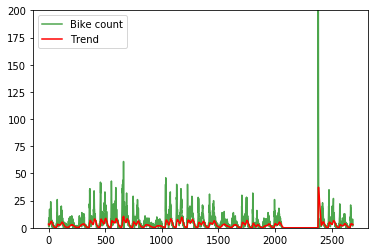

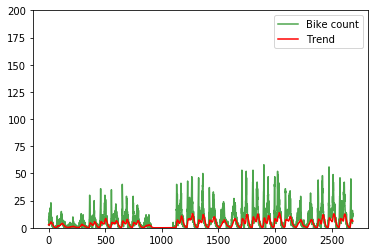

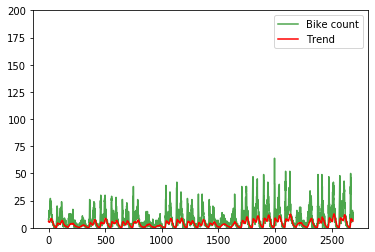

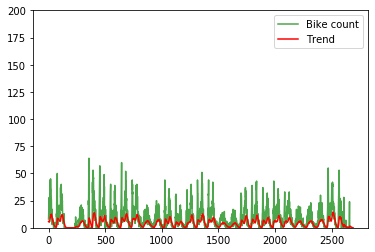

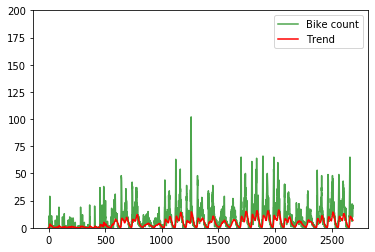

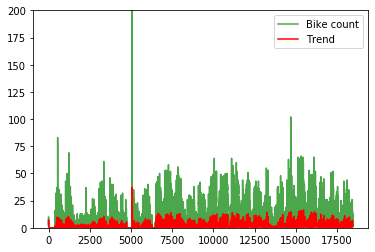

---------------------------------------------------------------------------
Pole data on point 50.84337
11391 tuples
Must be :18473
we lost 1770.5 HOURS OF DATA
We have 61.662967574297625 % of data.
Press ENTER to show the figure...


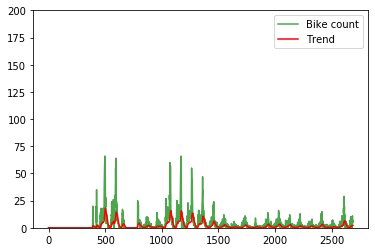

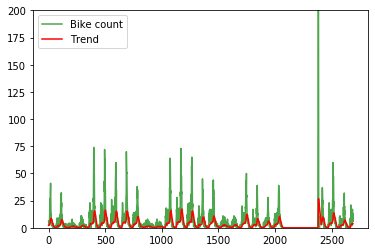

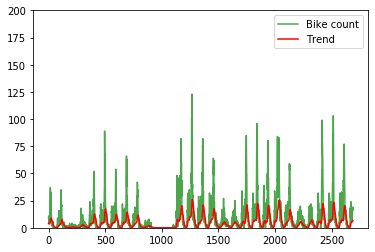

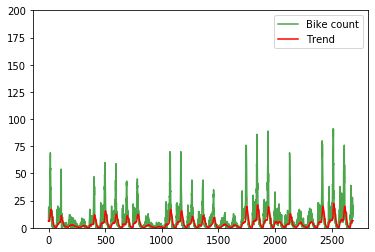

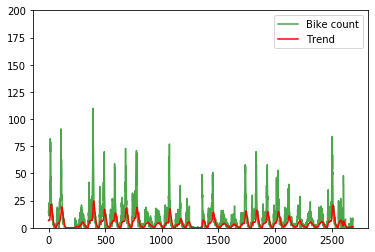

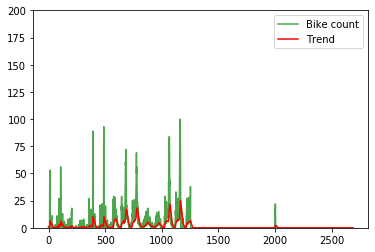

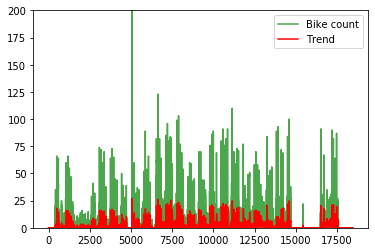

---------------------------------------------------------------------------
Pole data on point 50.84048
12781 tuples
Must be :18473
we lost 1423.0 HOURS OF DATA
We have 69.1874627835219 % of data.
Press ENTER to show the figure...


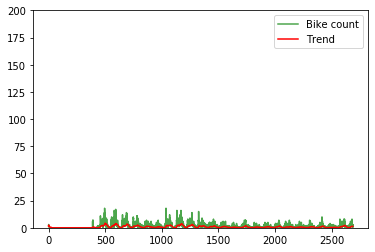

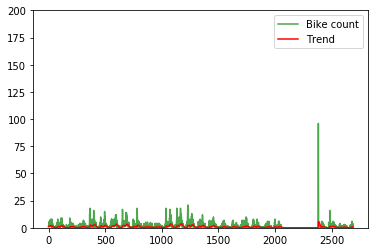

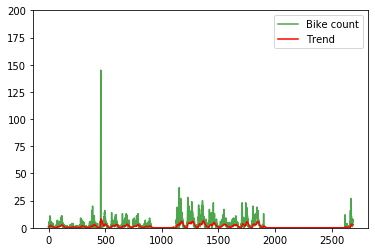

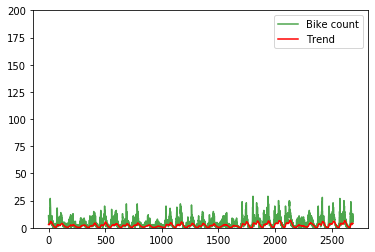

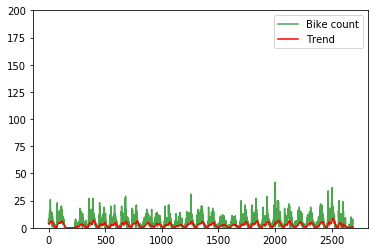

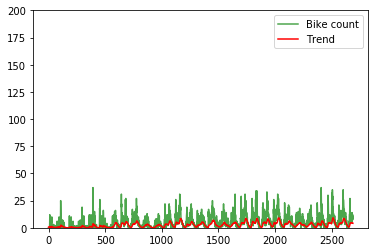

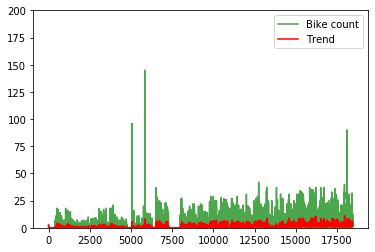

---------------------------------------------------------------------------
Pole data on point 50.88185
11943 tuples
Must be :18473
we lost 1632.5 HOURS OF DATA
We have 64.65111243436367 % of data.
Press ENTER to show the figure...


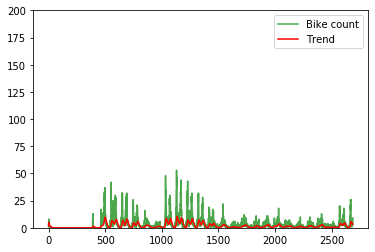

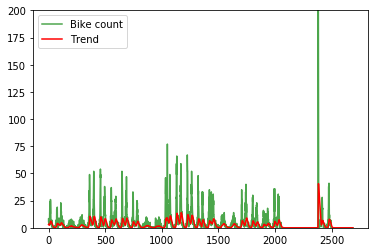

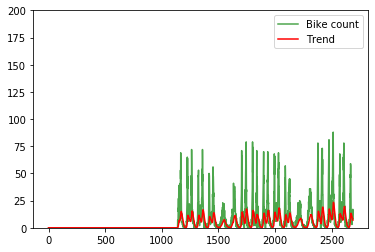

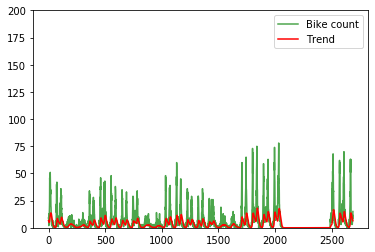

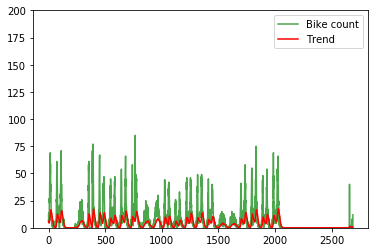

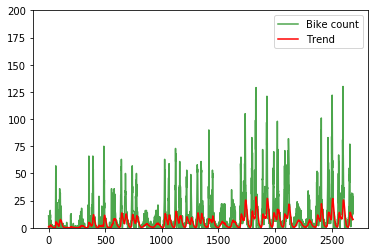

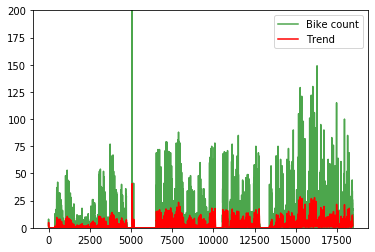

---------------------------------------------------------------------------
Pole data on point 50.8392
12702 tuples
Must be :18473
we lost 1442.75 HOURS OF DATA
We have 68.75981161695448 % of data.
Press ENTER to show the figure...


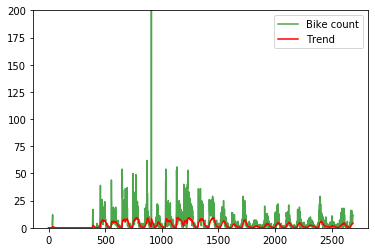

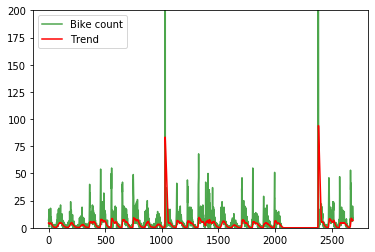

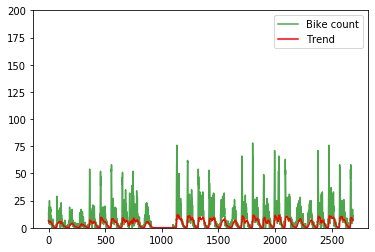

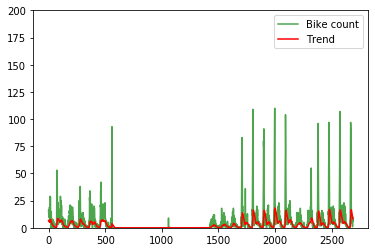

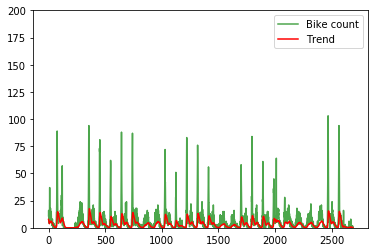

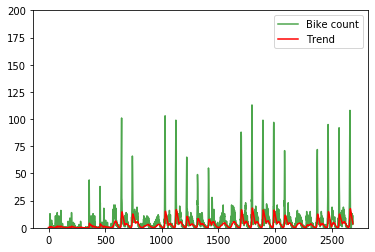

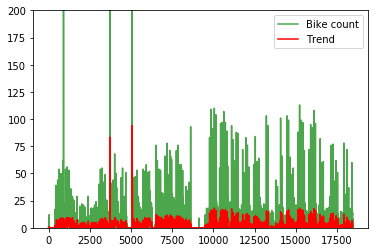

---------------------------------------------------------------------------
Pole data on point 50.85363
15416 tuples
Must be :18473
we lost 764.25 HOURS OF DATA
We have 83.45152384561251 % of data.
Press ENTER to show the figure...


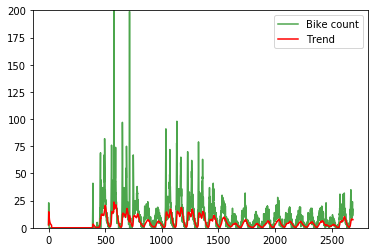

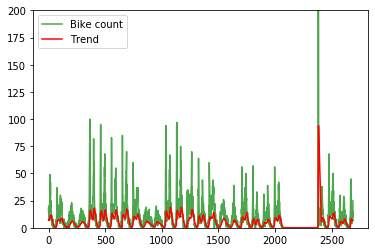

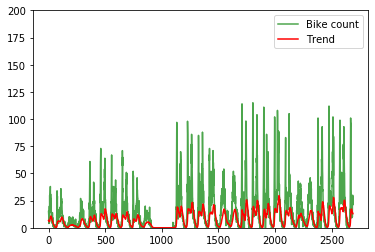

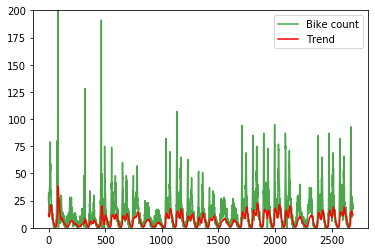

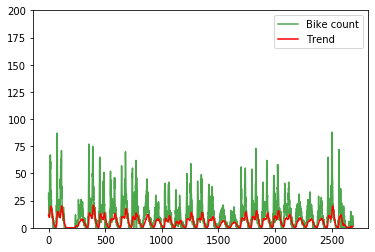

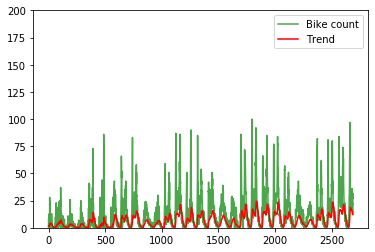

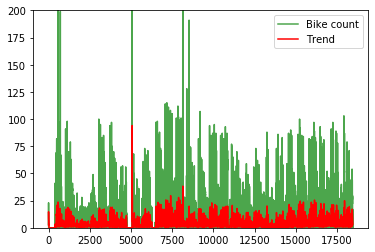

---------------------------------------------------------------------------
Pole data on point 50.82029
9385 tuples
Must be :18473
we lost 2272.0 HOURS OF DATA
We have 50.803875927028635 % of data.
Press ENTER to show the figure...


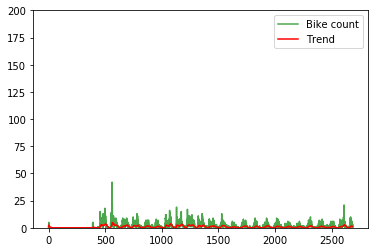

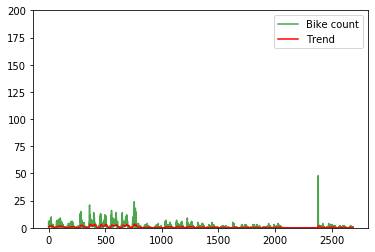

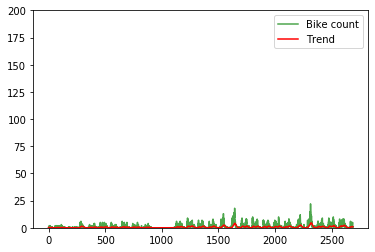

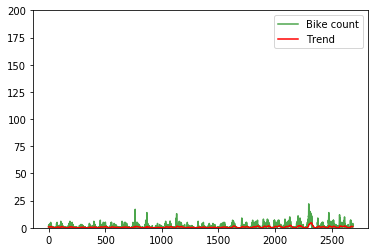

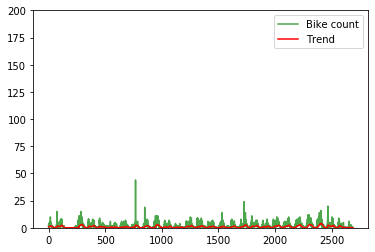

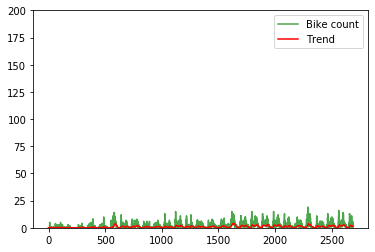

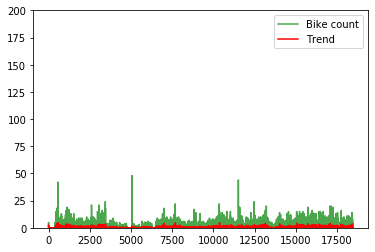

---------------------------------------------------------------------------
Pole data on point 50.84357
8387 tuples
Must be :18473
we lost 2521.5 HOURS OF DATA
We have 45.40139663292373 % of data.
Press ENTER to show the figure...


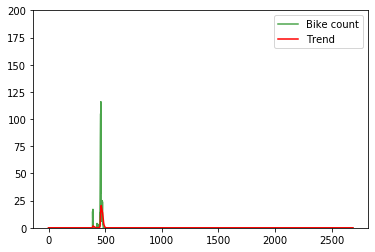

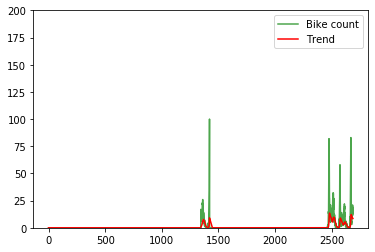

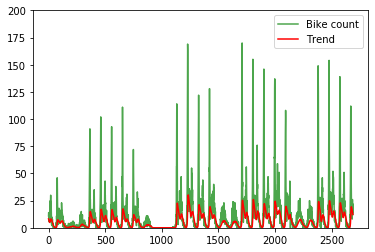

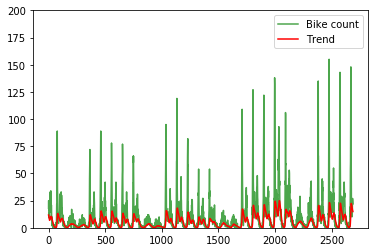

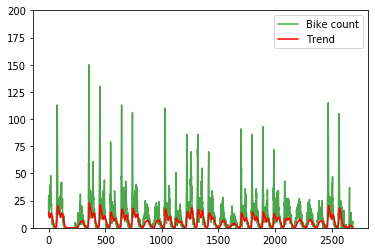

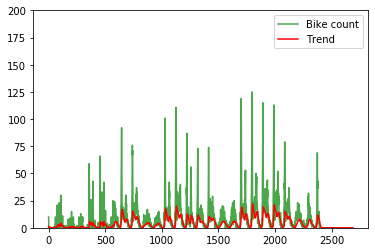

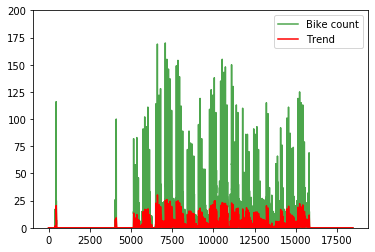

---------------------------------------------------------------------------
Pole data on point 50.82284
6070 tuples
Must be :18473
we lost 3100.75 HOURS OF DATA
We have 32.858766848914634 % of data.
Press ENTER to show the figure...


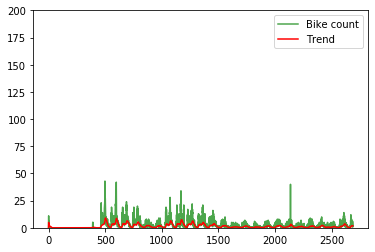

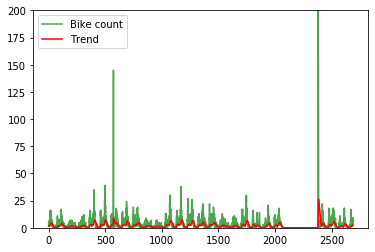

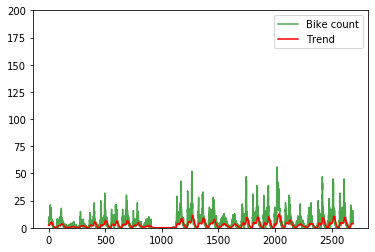

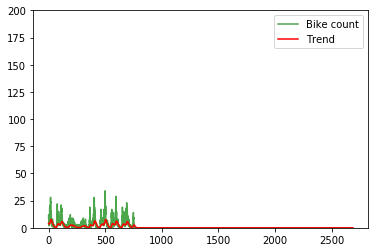

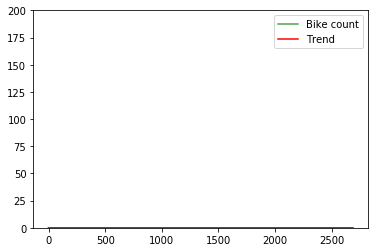

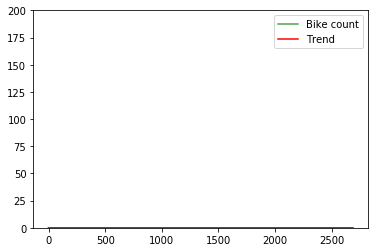

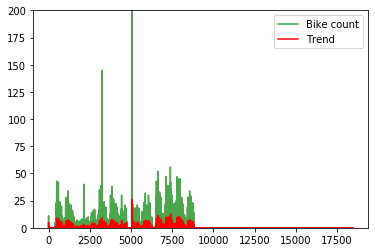

---------------------------------------------------------------------------
61.537258581593555 % total data.


In [4]:
days_per_graph=28
for latitude in latitudes_list:
    dataset=select_data_from_lat_csv(dataset_all_points,latitude)
    print("Pole data on point "+str(latitude))   
    y=dataset['bike_count']
    all_data_we_have+=y.shape[0]
    print(str(y.shape[0])+" tuples")
    print("Must be :"+str(int((timestamp_highest_value-timestamp_lowest_value)/900)))
    print("we lost "+str((int((timestamp_highest_value-timestamp_lowest_value)/900)-y.shape[0])/4)+" HOURS OF DATA")
    print("We have "+str((y.shape[0]*100/((timestamp_highest_value-timestamp_lowest_value)/900)))+" % of data.")
    if (y.shape[0]*100/((timestamp_highest_value-timestamp_lowest_value)/900))!=0.0:
        print("Press ENTER to show the figure...")
        #input()
        show_data_real_timestamp_bikes_list(dataset,timestamp_lowest_value,timestamp_highest_value)
    else:
        print("we don't show the data because is 0.0 %. Press ENTER...")
        #input()
    print("---------------------------------------------------------------------------")
    #print(y[0:10])

print(str(all_data_we_have*100/(int((timestamp_highest_value-timestamp_lowest_value)/900)*9))+" % total data.")